In [ ]:
'''
Create a Linear Regression Model using Python/R to predict home prices using
Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston
Housing dataset contains information about various houses in Boston through
different parameters. There are 506 samples and 14 feature variables in this
dataset.
The objective is to predict the value of prices of the house using the given
features.
'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#file_path='D:\College\Sem6\DSBDAL\1_boston_housing.csv'
from google.colab import files
# Upload the dataset file
uploaded = files.upload()

Saving 1_boston_housing.csv to 1_boston_housing.csv


In [ ]:
df=pd.read_csv('1_boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
x=df.drop(columns=['MEDV'])
y=df['MEDV']

In [ ]:
from sklearn.feature_selection import r_regression
corr_arr=(r_regression(x,y))
print(corr_arr)
'''
The output array you provided represents the correlation coefficients between each feature in X and the target variable y (house prices in the Boston Housing dataset). Here’s how to interpret these values:

Explanation of the Correlation Coefficients:
Correlation is a statistical measure that describes the relationship between two variables. It shows whether and how strongly pairs of variables are related. There are three main types of correlation:
Each value in the array corresponds to a feature's correlation with the target variable (MEDV). The values range from -1 to +1, where:

+1 indicates a perfect positive correlation.

-1 indicates a perfect negative correlation.

0 indicates no correlation.

Positive Correlation: Features with positive correlation suggest that as the feature's value increases, the house price tends to increase as well.
For example, a feature with a high positive correlation (like 0.695) could be an important predictor of house prices.

Negative Correlation: Features with negative correlation suggest that as the feature's value increases, the house price tends to decrease.
For example, a feature with a correlation of -0.737 would be a strong negative predictor of house prices.

Feature Selection: Strongly correlated features (either positive or negative) are often more important in predicting the target variable.
Features with very low correlation may be less useful
'''

[-0.38830461  0.36044534 -0.48372516  0.17526018 -0.42732077  0.69535995
 -0.37695457  0.24992873 -0.38162623 -0.46853593 -0.50778669  0.33346082
 -0.73766273]


"\nThe output array you provided represents the correlation coefficients between each feature in X and the target variable y (house prices in the Boston Housing dataset). Here’s how to interpret these values:\n\nExplanation of the Correlation Coefficients:\nCorrelation is a statistical measure that describes the relationship between two variables. It shows whether and how strongly pairs of variables are related. There are three main types of correlation:\nEach value in the array corresponds to a feature's correlation with the target variable (MEDV). The values range from -1 to +1, where:\n\n+1 indicates a perfect positive correlation.\n\n-1 indicates a perfect negative correlation.\n\n0 indicates no correlation.\n\nPositive Correlation: Features with positive correlation suggest that as the feature's value increases, the house price tends to increase as well.\nFor example, a feature with a high positive correlation (like 0.695) could be an important predictor of house prices.\n\nNegati

In [ ]:
# Compute the correlation of each feature with 'medv'
correlation_with_medv = df.corr()['MEDV']
print(correlation_with_medv)

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


In [ ]:
low_correlation_threshold = 0.3
#Identify features that have an absolute correlation with 'medv' below the threshold
features_to_drop = correlation_with_medv[abs(correlation_with_medv) < low_correlation_threshold].index.tolist()
#Drop those features from the DataFrame
print(features_to_drop)
new_df = df.drop(columns=features_to_drop)
#Display which features were dropped
print(f"Features dropped: {features_to_drop}")
print(f"Remaining features: {new_df.columns}")

['chas', 'dis']
Features dropped: ['chas', 'dis']
Remaining features: Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'rad', 'tax', 'ptratio', 'b',
       'lstat', 'MEDV'],
      dtype='object')


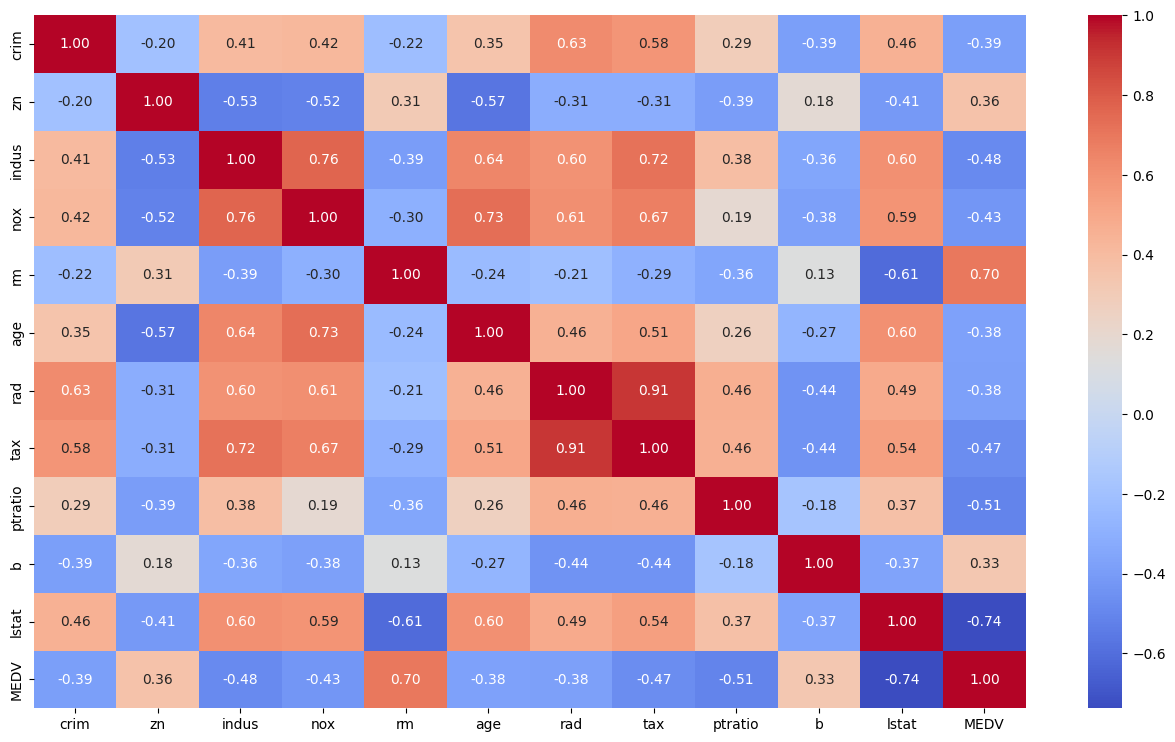

In [ ]:
correlation_matrix_filtered = new_df.corr()
#print(correlation_matrix_filtered)
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
from scipy.stats import zscore
#Used later for identifying outliers based on how far a row's mean is from the rest.
new_df['mean_scores'] = new_df[[col for col in new_df.columns]].mean(axis=1)
new_df

,crim,zn,indus,nox,rm,age,rad,tax,ptratio,b,lstat,MEDV,mean_scores
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296,15.3,396.90,4.98,24.0,69.234110
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242,17.8,396.90,9.14,21.6,65.193943
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242,17.8,392.83,4.03,34.7,64.100941
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222,18.7,394.63,2.94,33.4,60.844864
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222,18.7,396.90,5.33,36.2,62.182004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1,273,21.0,391.99,9.67,22.4,67.276552
502,0.04527,0.0,11.93,0.573,6.120,76.7,1,273,21.0,396.90,9.08,20.6,68.079023
503,0.06076,0.0,11.93,0.573,6.976,91.0,1,273,21.0,396.90,5.64,23.9,69.331647
504,0.10959,0.0,11.93,0.573,6.794,89.3,1,273,21.0,393.45,6.48,22.0,68.803049


In [ ]:
#Scales all features to a common range (0 to 1).
#Linear regression is sensitive to feature scales. Normalization ensures no single feature dominates due to its larger values.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
new_df

,crim,zn,indus,nox,rm,age,rad,tax,ptratio,b,lstat,MEDV,mean_scores
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.300933
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.234545
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,0.216584
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,0.163080
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.185052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.386831,0.580954,0.681771,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667,0.268766
502,0.000438,0.00,0.420455,0.386831,0.490324,0.760041,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667,0.281952
503,0.000612,0.00,0.420455,0.386831,0.654340,0.907312,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000,0.302535
504,0.001161,0.00,0.420455,0.386831,0.619467,0.889804,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778,0.293849


In [ ]:
outliers = []
new_df['z_score'] = zscore(new_df['mean_scores'])
new_df

,crim,zn,indus,nox,rm,age,rad,tax,ptratio,b,lstat,MEDV,mean_scores,z_score
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.300933,-0.565072
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.234545,-0.842300
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,0.216584,-0.917299
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,0.163080,-1.140724
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.185052,-1.048972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.386831,0.580954,0.681771,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667,0.268766,-0.699395
502,0.000438,0.00,0.420455,0.386831,0.490324,0.760041,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667,0.281952,-0.644332
503,0.000612,0.00,0.420455,0.386831,0.654340,0.907312,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000,0.302535,-0.558379
504,0.001161,0.00,0.420455,0.386831,0.619467,0.889804,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778,0.293849,-0.594651


In [ ]:
#Identify rows whose mean_scores are statistically far from the average (z-score > 2 or < -2).
# Outliers can skew the regression line, reducing model accuracy.
outliers = new_df[abs(new_df['z_score']) > 2]
outliers

outliers.shape

(15, 14)

In [ ]:
#Remove those extreme rows from the dataset to make the model more robust and generalizable.
new_df = new_df[abs(new_df['z_score']) < 2]

x = new_df.drop(new_df[['mean_scores','z_score','MEDV']],axis=1)
y = new_df['MEDV']

new_df

,crim,zn,indus,nox,rm,age,rad,tax,ptratio,b,lstat,MEDV,mean_scores,z_score
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.300933,-0.565072
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.234545,-0.842300
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,0.216584,-0.917299
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,0.163080,-1.140724
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.185052,-1.048972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.386831,0.580954,0.681771,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667,0.268766,-0.699395
502,0.000438,0.00,0.420455,0.386831,0.490324,0.760041,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667,0.281952,-0.644332
503,0.000612,0.00,0.420455,0.386831,0.654340,0.907312,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000,0.302535,-0.558379
504,0.001161,0.00,0.420455,0.386831,0.619467,0.889804,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778,0.293849,-0.594651


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' are your features and 'y' is your target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np
y_pred = lr1.predict(x_test)
print(y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(r2)

'''
Mean Absolute Error (MAE): 0.0561

This is the average amount by which the model's predictions are off from the actual values. On average, the model is off by about 0.0561 units, which is a very small error. So, the model is doing a good job of predicting.

Root Mean Squared Error (RMSE): 0.0801

This gives an idea of how big the model's mistakes usually are. It's another way to measure error, but it gives more weight to larger mistakes. In this case, the model's typical mistake is about 0.0801 units. Again, this is a relatively small number, so the model is performing well.

R-squared (R²): 0.8510

This tells us how much of the variation (or change) in the actual values the model is able to explain. Here, the model explains 85.1% of the variation in the data. So, it's capturing most of the important patterns in the data.
'''

[ 0.36972325  0.44359562  0.30716926  0.35524353  0.2098075   0.39494606
  0.1447128   0.55644908  0.25582903  0.65452042  0.3886051   0.34516634
  0.28751616  0.77687185  0.45125086  0.4591597   0.32962389  0.32414335
  0.72780733  0.17833207  0.38503443  0.44753002  0.25293862  0.597103
  0.40379688  0.399603    0.3854918   0.4527186   0.45821092  0.19424797
  0.44222333  0.18208827  0.48134577  0.41309123  0.20158026  0.42898388
  0.55861168  0.44173913  0.55755884  0.5688301   0.11458355  0.10108843
  0.22433213  0.32279816  0.28902601  0.75334023  0.21989526  0.2711949
  0.31637027  0.29082771  0.18116158  0.5119304   0.50543379  0.57963898
  0.33237459  0.44208528  0.22659045  0.49315539  0.43388779  0.11680229
  0.39874033 -0.01202279  0.4708552   0.46219179  0.38992197  0.49620752
  0.4601353   0.81656553  0.32885797  0.42690135  0.36143327  0.32653003
  0.39309561  0.56710024  0.05105159  0.38539301  0.53825883  0.28868702
  0.45176819  0.34405015  0.23711335  0.55159445  0.09

"\nMean Absolute Error (MAE): 0.0561\n\nThis is the average amount by which the model's predictions are off from the actual values. On average, the model is off by about 0.0561 units, which is a very small error. So, the model is doing a good job of predicting.\n\nRoot Mean Squared Error (RMSE): 0.0801\n\nThis gives an idea of how big the model's mistakes usually are. It's another way to measure error, but it gives more weight to larger mistakes. In this case, the model's typical mistake is about 0.0801 units. Again, this is a relatively small number, so the model is performing well.\n\nR-squared (R²): 0.8510\n\nThis tells us how much of the variation (or change) in the actual values the model is able to explain. Here, the model explains 85.1% of the variation in the data. So, it's capturing most of the important patterns in the data.\n"

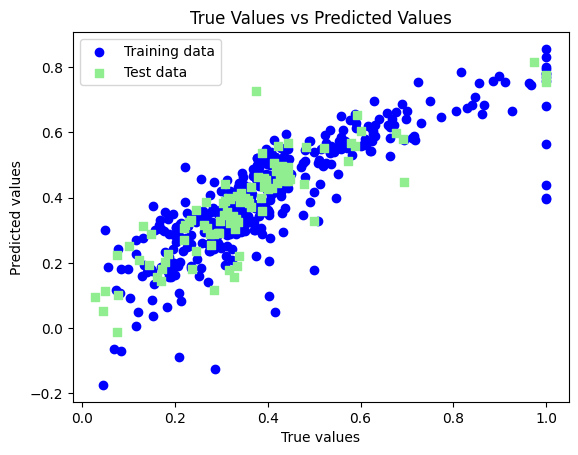

In [ ]:
plt.scatter(y_train, lr1.predict(x_train), c='blue', marker='o', label='Training data')
plt.scatter(y_test, lr1.predict(x_test), c='lightgreen', marker='s', label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title("True Values vs Predicted Values")
plt.legend(loc='upper left')
plt.show()